In [33]:

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import MarkovNetwork
import numpy as np
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation

Exercitiul 1.a)

Cliques:  [['A2', 'A4', 'A5'], ['A2', 'A1'], ['A3', 'A4'], ['A3', 'A1']]


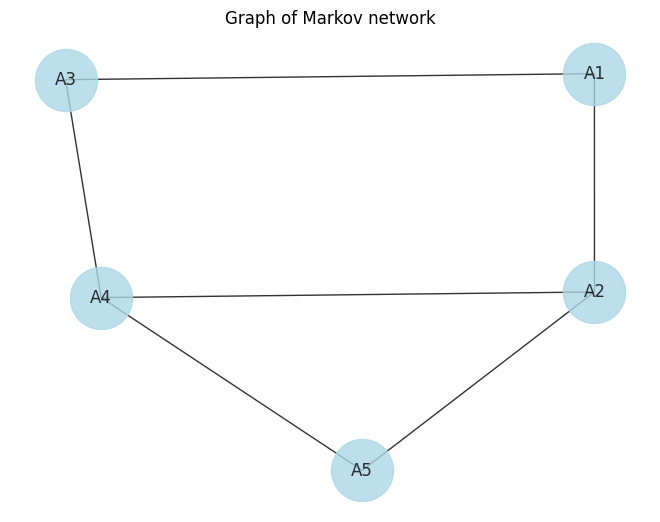

In [30]:
model=MarkovNetwork()
edges=[('A1','A2'),('A1','A3'),('A2','A4'),('A2','A5'),('A3','A4'),('A4','A5')]
model.add_edges_from(edges)

cliques=list(nx.find_cliques(model))
print('Cliques: ',cliques)

G = nx.Graph(model.edges())
pos = nx.spring_layout(G)
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_size=2000,
    node_color='lightblue',
    font_size=12,
    alpha=0.8
)
plt.title("Graph of Markov network")
plt.show()



Exercitiul 1.b)

In [18]:
import math

coef = {'A1':2, 'A2':4, 'A3':6, 'A4':8, 'A5':5}
vars = ['A1','A2','A3','A4','A5']

#functia de partitie
Z = 1
for v in vars:
    ci = coef[v]
    Z *= (math.exp(ci) + math.exp(-ci))
print("Z =", Z)

# enumeram configuratiile si calculam probabilitatile
probs = []
for A1 in [-1, 1]:
    for A2 in [-1, 1]:
        for A3 in [-1, 1]:
            for A4 in [-1, 1]:
                for A5 in [-1, 1]:
                    s = {'A1': A1, 'A2': A2, 'A3': A3, 'A4': A4, 'A5': A5}
                    exponent = (
                        coef['A1']*A1 +
                        coef['A2']*A2 +
                        coef['A3']*A3 +
                        coef['A4']*A4 +
                        coef['A5']*A5
                    )
                    unnorm = math.exp(exponent)
                    probs.append((s, unnorm / Z))


probs_sorted = sorted(probs, key=lambda x: x[1], reverse=True)
for i,(cfg,p) in enumerate(probs_sorted, start=1):
    print(f"#{i}: cfg={cfg}, P={p}")


Z = 73352101389.00583
#1: cfg={'A1': 1, 'A2': 1, 'A3': 1, 'A4': 1, 'A5': 1}, P=0.9816337633672501
#2: cfg={'A1': -1, 'A2': 1, 'A3': 1, 'A4': 1, 'A5': 1}, P=0.017979249530823686
#3: cfg={'A1': 1, 'A2': -1, 'A3': 1, 'A4': 1, 'A5': 1}, P=0.00032930144189701014
#4: cfg={'A1': 1, 'A2': 1, 'A3': 1, 'A4': 1, 'A5': -1}, P=4.456610390935682e-05
#5: cfg={'A1': -1, 'A2': -1, 'A3': 1, 'A4': 1, 'A5': 1}, P=6.031366295325117e-06
#6: cfg={'A1': 1, 'A2': 1, 'A3': -1, 'A4': 1, 'A5': 1}, P=6.031366295325117e-06
#7: cfg={'A1': -1, 'A2': 1, 'A3': 1, 'A4': 1, 'A5': -1}, P=8.162566658815841e-07
#8: cfg={'A1': -1, 'A2': 1, 'A3': -1, 'A4': 1, 'A5': 1}, P=1.1046832707085733e-07
#9: cfg={'A1': 1, 'A2': 1, 'A3': 1, 'A4': -1, 'A5': 1}, P=1.1046832707085733e-07
#10: cfg={'A1': 1, 'A2': -1, 'A3': 1, 'A4': 1, 'A5': -1}, P=1.4950262332809243e-08
#11: cfg={'A1': -1, 'A2': 1, 'A3': 1, 'A4': -1, 'A5': 1}, P=2.023297987272401e-09
#12: cfg={'A1': 1, 'A2': -1, 'A3': -1, 'A4': 1, 'A5': 1}, P=2.023297987272401e-09
#13: cfg={

Exercitiul 2.a

In [97]:

mn = MarkovNetwork()

edges=[(f'X_{i}_{j}',f'X_{i-1}_{j}') for i in range(2,6) for j in range(1,6)]
edges+=[(f'X_{i}_{j}',f'X_{i+1}_{j}') for i in range(1,4) for j in range(1,6)]
edges+=[(f'X_{i}_{j}',f'X_{i}_{j+1}') for i in range(1,6) for j in range(1,4)]
edges+=[(f'X_{i}_{j}',f'X_{i}_{j-1}') for i in range(1,6) for j in range(2,6)]


mn.add_edges_from(edges)


Exercitiul 2.b

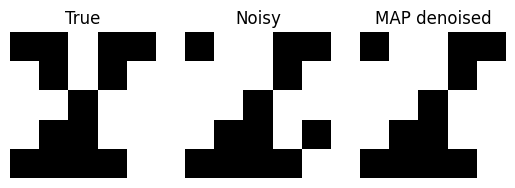

Indicele pixelilor inversati: [ 6  1 19]
Imaginea adevarata:
 [[-1 -1  1 -1 -1]
 [ 1 -1  1 -1  1]
 [ 1  1 -1  1  1]
 [ 1 -1 -1  1  1]
 [-1 -1 -1 -1  1]]
Imaginea cu zgomote:
 [[-1  1  1 -1 -1]
 [ 1  1  1 -1  1]
 [ 1  1 -1  1  1]
 [ 1 -1 -1  1 -1]
 [-1 -1 -1 -1  1]]
Rezultatul MAP:
 [[-1  1  1 -1 -1]
 [ 1  1  1 -1  1]
 [ 1  1 -1  1  1]
 [ 1 -1 -1  1  1]
 [-1 -1 -1 -1  1]]


In [98]:

# Generarea imaginii adevarate si a versiunii cu zgomot

vals=[-1,1]
x_true=np.random.choice(vals,size=(5,5))

nodes = [f'X_{i}_{j}' for i in range(1,6) for j in range(1,6)]


flip_idx = np.random.choice(25, size=3, replace=False)
Y = x_true.copy().flatten()
for idx in flip_idx:
    Y[idx] = -Y[idx]
Y = Y.reshape(5, 5)


#Definirea potentialelor unare si perechi (factori)
lambda_val =1
st=[-1,1]

for i in range(1,6):
    for j in range(1,6):
        var = f'X_{i}_{j}'
        y = int(Y[i-1, j-1])
        values = np.array([
            math.exp(-lambda_val * ((-1 - y)**2)),
            math.exp(-lambda_val * ((1 - y)**2))
        ])
        factor = DiscreteFactor(variables=[var], cardinality=[2], values=values)
        mn.add_factors(factor)

# Factori perechi – incurajeaza pixeli vecini sa aiba valori similare (imagine neteda)
pairwise = np.zeros((2,2))
for a_idx, a in enumerate(st):
    for b_idx, b in enumerate(st):
        pairwise[a_idx, b_idx] = math.exp(-0.5*(a - b)**2)

for (u, v) in edges:
    factor = DiscreteFactor(variables=[u, v], cardinality=[2, 2], values=pairwise)
    mn.add_factors(factor)

bp = BeliefPropagation(mn)
map_result = bp.map_query(variables=nodes)

map_img = np.array([st[map_result[f'X_{i}_{j}']] for i in range(1,6) for j in range(1,6)]).reshape(5, 5)
plt.subplot(1,3,1); plt.title("True"); plt.imshow((x_true+1)/2, cmap='gray'); plt.axis('off')
plt.subplot(1,3,2); plt.title("Noisy"); plt.imshow((Y+1)/2, cmap='gray'); plt.axis('off')
plt.subplot(1,3,3); plt.title("MAP denoised"); plt.imshow((map_img+1)/2, cmap='gray'); plt.axis('off')
plt.show()



print("Indicele pixelilor inversati:", flip_idx)
print("Imaginea adevarata:\n", x_true)
print("Imaginea cu zgomote:\n", Y)
print("Rezultatul MAP:\n", map_img)